In [1]:
import importlib
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns
from atmacup_18 import constants

import utils

importlib.reload(utils)

<module 'utils' from '/home/tatsuya/projects/atmacup/atmacup_18/experiments/main/v00/v00_05_01/utils.py'>

In [2]:
RANDOM_STATE = 2024
utils.seed_everything(RANDOM_STATE)

## データ読み込み

In [3]:
notebook_dir = Path().resolve()
DATA_DIR = notebook_dir.parents[3].joinpath("data")
DATASET_DIR = DATA_DIR.joinpath("atmaCup#18_dataset")
TR_FEATURES_CSV = DATASET_DIR.joinpath("train_features.csv")
TS_FEATURES_CSV = DATASET_DIR.joinpath("test_features.csv")
IMAGES_DIR = DATASET_DIR.joinpath("images")
TRAFFIC_LIGHTS_CSV = DATASET_DIR.joinpath("traffic_lights.csv")

IMAGE_NAMES = ["image_t.png", "image_t-0.5.png", "image_t-1.0.png"]
TRAFFIC_LIGHTS_BBOX_IMAGE_NAME = constants.TRAFFIC_LIGHT_BBOX_IMAGE_NAME

In [4]:
tr_df = utils.read_feature_csv(TR_FEATURES_CSV)
tr_df.head(2)

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,scene_id,scene_dsec
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079,"""00066be8e20318869c38c66be46663…","""320"""
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083,"""00066be8e20318869c38c66be46663…","""420"""


In [5]:
ts_df = utils.read_feature_csv(TS_FEATURES_CSV)
ts_df.head(2)

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,scene_id,scene_dsec
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,str,str
"""012baccc145d400c896cb82065a93d…",3.374273,-0.01936,-34.008415,17.0,0.0,false,0.0,false,"""drive""",false,false,"""012baccc145d400c896cb82065a93d…","""120"""
"""012baccc145d400c896cb82065a93d…",2.441048,-0.022754,307.860077,295.0,0.0,true,0.0,false,"""drive""",false,false,"""012baccc145d400c896cb82065a93d…","""220"""


In [6]:
tr_tl_bbox_images = utils.load_npy_images(
    IMAGES_DIR,
    ids=tr_df.get_column("ID").to_list(),
    image_names=[TRAFFIC_LIGHTS_BBOX_IMAGE_NAME],
)
print(tr_tl_bbox_images.shape)
ts_tl_bbox_images = utils.load_npy_images(
    IMAGES_DIR,
    ids=ts_df.get_column("ID").to_list(),
    image_names=[TRAFFIC_LIGHTS_BBOX_IMAGE_NAME],
)
print(ts_tl_bbox_images.shape)

(43371, 1, 64, 128, 8)
(1727, 1, 64, 128, 8)


In [7]:
tr_images = utils.load_images(
    IMAGES_DIR, ids=tr_df.get_column("ID").to_list(), image_names=IMAGE_NAMES
)
print(tr_images.shape)
ts_images = utils.load_images(
    IMAGES_DIR, ids=ts_df.get_column("ID").to_list(), image_names=IMAGE_NAMES
)
print(ts_images.shape)

(43371, 3, 64, 128, 3)
(1727, 3, 64, 128, 3)


In [8]:
tr_images = utils.preprocess_images([tr_images, tr_tl_bbox_images])
ts_images = utils.preprocess_images([ts_images, ts_tl_bbox_images])

print(tr_images.shape)
print(ts_images.shape)

(43371, 17, 64, 128)
(1727, 17, 64, 128)


## Target

In [9]:
target = utils.CoordinateTarget(prefix="tg_")
target.fit(tr_df)

tg_df = target.transform(tr_df)
print(tg_df.columns)
print(tg_df.describe().glimpse())
tr_df = pl.concat([tr_df, tg_df], how="horizontal")

['tg_cood_x_0', 'tg_cood_y_0', 'tg_cood_z_0', 'tg_cood_x_1', 'tg_cood_y_1', 'tg_cood_z_1', 'tg_cood_x_2', 'tg_cood_y_2', 'tg_cood_z_2', 'tg_cood_x_3', 'tg_cood_y_3', 'tg_cood_z_3', 'tg_cood_x_4', 'tg_cood_y_4', 'tg_cood_z_4', 'tg_cood_x_5', 'tg_cood_y_5', 'tg_cood_z_5']
Rows: 9
Columns: 19
$ statistic   <str> 'count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
$ tg_cood_x_0 <f64> 43371.0, 0.0, 4.122443942757371, 3.2667167639213908, -1.7321542071537557, 1.116530690565041, 3.843337458989432, 6.4281197924248215, 12.392587231992154
$ tg_cood_y_0 <f64> 43371.0, 0.0, 0.0019486856369589753, 0.11686590022408185, -2.5341378248203235, -0.02646308932096216, 0.0010884804706597444, 0.030664179622664968, 3.4595563267615925
$ tg_cood_z_0 <f64> 43371.0, 0.0, 0.001247332026343412, 0.040745039147660006, -0.9965478318668152, -0.017624552286421614, 0.0011112325970167394, 0.01959056385186172, 1.4479292511292303
$ tg_cood_x_1 <f64> 43371.0, 0.0, 8.694386412319787, 6.894354638218222, -3.1

## 特徴量

In [10]:
feature = utils.Feature(prefix="ft_")
feature.fit(tr_df)

ft_df = feature.transform(tr_df)
print(ft_df.columns)
print(ft_df.describe().glimpse())
tr_df = pl.concat([tr_df, ft_df], how="horizontal")

ft_df = feature.transform(ts_df)
print(ft_df.columns)
print(ft_df.describe().glimpse())
ts_df = pl.concat([ts_df, ft_df], how="horizontal")

['ft_vEgo', 'ft_aEgo', 'ft_steeringAngleDeg', 'ft_steeringTorque', 'ft_brake', 'ft_brakePressed', 'ft_gas', 'ft_gasPressed', 'ft_is_gearShifter_drive', 'ft_is_gearShifter_neutral', 'ft_is_gearShifter_park', 'ft_is_gearShifter_reverse', 'ft_leftBlinker', 'ft_rightBlinker']
Rows: 9
Columns: 15
$ statistic                 <str> 'count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
$ ft_vEgo                   <f64> 43371.0, 0.0, 9.172175823216334, 7.226919878374694, -0.1619189828634262, 2.5786657333374023, 8.518790245056152, 14.286815643310547, 27.55126190185547
$ ft_aEgo                   <f64> 43371.0, 0.0, -0.015654028629347255, 0.6324016778486632, -4.936206340789795, -0.2363678514957428, -1.8347540436410405e-15, 0.22229795157909396, 3.1400704383850098
$ ft_steeringAngleDeg       <f64> 43371.0, 0.0, -2.065172574071012, 65.54882159006848, -481.394287109375, -3.461754322052002, -0.35647091269493103, 2.6269068717956543, 484.69171142578125
$ ft_steeringTorque         <f64>

## モデリング

In [11]:
N_SPLITS = 2

In [12]:
model_params = {
    "dnn": {
        "n_img_channels": tr_images.shape[1],
        "n_features": len(feature.columns),
        "n_targets": len(target.columns),
        "segmentation_model_params": {
            "encoder_name": "resnet18",
            "encoder_weights": "imagenet",
            "decoder_channels": (256, 128, 64, 32, 16),
        },
        "dropout": 0.0,
        "embed_dim": 128,
        "n_layers": 1,
    },
    "dev": "cuda",
}

lr = 1e-4
fit_params = {
    "dnn": {
        "tr_batch_size": 128,
        "vl_batch_size": 32,
        "trainer_params": {
            "criterion_params": {},
            "opt": "adamw",
            "opt_params": {"lr": lr, "weight_decay": 1e-4},
            "backbone_opt_params": {"lr": lr, "weight_decay": 1e-4},
            "sch_params": {
                "max_lr": lr,
                "pct_start": 0.1,
                "div_factor": 25,
                "final_div_factor": 1000,
            },
            "epochs": 15,
            "dev": "cuda",
            "prefix": "",
            "save_best": False,
            "save_epochs": [],
            "maximize_score": False,
            "grad_max_norm": None,
        },
    },
}

In [13]:
models, oof_preds = utils.train(
    model_params=model_params,
    fit_params=fit_params,
    df=tr_df,
    images=tr_images,
    target_cols=target.columns,
    feature_cols=feature.columns,
    group_col="scene_id",
    n_splits=N_SPLITS,
)

-----------------
-----------------
Training fold 0...
train samples: 21685, valid samples: 21686
Save model : model.pth

epoch  0
lr  4.000000000000002e-06
lr  4.000000000000002e-06
lr  4.000000000000002e-06
lr  4.000000000000002e-06


100%|██████████| 678/678 [00:08<00:00, 84.56it/s]



Train Loss: 43.6042
{'loss': 43.604184229698404, 'loss_mse_0': 1.8580802502716787, 'loss_mse_1': 0.1293112036039138, 'loss_mse_2': 0.05175398260399082, 'loss_mse_3': 4.13715454777317, 'loss_mse_4': 0.2795657823248022, 'loss_mse_5': 0.10836423609471886, 'loss_mse_6': 4.83876319996704, 'loss_mse_7': 0.5412342659467776, 'loss_mse_8': 0.1583199097207312, 'loss_mse_9': 5.818370711873975, 'loss_mse_10': 0.8569340182126627, 'loss_mse_11': 0.21465746035589975, 'loss_mse_12': 9.379844226780728, 'loss_mse_13': 1.357131588388477, 'loss_mse_14': 0.2968258186733934, 'loss_mse_15': 11.053597159639619, 'loss_mse_16': 2.1885435179140442, 'loss_mse_17': 0.3357321248781046}
Valid Loss: 13.9241
{'loss': 13.92407242246082, 'loss_mse_0': 0.47279578614375584, 'loss_mse_1': 0.09455554217243001, 'loss_mse_2': 0.04759813774965022, 'loss_mse_3': 0.9955391328243379, 'loss_mse_4': 0.21489179956899807, 'loss_mse_5': 0.09852297377297353, 'loss_mse_6': 1.3137145995390451, 'loss_mse_7': 0.37232316058447756, 'loss_ms

100%|██████████| 678/678 [00:08<00:00, 83.73it/s]



Train Loss: 7.2233
{'loss': 7.223302327669584, 'loss_mse_0': 0.17711333652748865, 'loss_mse_1': 0.07281094572380097, 'loss_mse_2': 0.047067626792739126, 'loss_mse_3': 0.38112719026366637, 'loss_mse_4': 0.16938687946933967, 'loss_mse_5': 0.09767995474959267, 'loss_mse_6': 0.4918543380745769, 'loss_mse_7': 0.29793108673490715, 'loss_mse_8': 0.14337131015118762, 'loss_mse_9': 0.6377911413386024, 'loss_mse_10': 0.4533233267844781, 'loss_mse_11': 0.1892858967625883, 'loss_mse_12': 0.8363357064639323, 'loss_mse_13': 0.693788888715428, 'loss_mse_14': 0.24855991638094715, 'loss_mse_15': 1.0080083980715486, 'loss_mse_16': 0.9856095432177098, 'loss_mse_17': 0.29225687982415305}
Valid Loss: 5.3213
{'loss': 5.321263205864437, 'loss_mse_0': 0.09883928297301836, 'loss_mse_1': 0.06979777472461834, 'loss_mse_2': 0.04425362331839416, 'loss_mse_3': 0.1891746487424525, 'loss_mse_4': 0.14536592876675997, 'loss_mse_5': 0.08725112381976395, 'loss_mse_6': 0.2706275714017385, 'loss_mse_7': 0.2368665742976343

100%|██████████| 678/678 [00:08<00:00, 82.65it/s]



Train Loss: 3.9851
{'loss': 3.9851382554635495, 'loss_mse_0': 0.05660979116897611, 'loss_mse_1': 0.05610668153320191, 'loss_mse_2': 0.043884739720609765, 'loss_mse_3': 0.1192293304002144, 'loss_mse_4': 0.11616075067565991, 'loss_mse_5': 0.08845580281061534, 'loss_mse_6': 0.17056065908021475, 'loss_mse_7': 0.19950171701125138, 'loss_mse_8': 0.13178914428286298, 'loss_mse_9': 0.22011360243932734, 'loss_mse_10': 0.29750566281510527, 'loss_mse_11': 0.17631465333276952, 'loss_mse_12': 0.3021522223420397, 'loss_mse_13': 0.46171906616913494, 'loss_mse_14': 0.22569779857728609, 'loss_mse_15': 0.3825738136408597, 'loss_mse_16': 0.6630411959258762, 'loss_mse_17': 0.2737216405438248}
Valid Loss: 6.7921
{'loss': 6.792103887483433, 'loss_mse_0': 0.05897912572091308, 'loss_mse_1': 0.11500818277214679, 'loss_mse_2': 0.04208900749746567, 'loss_mse_3': 0.13309737325956425, 'loss_mse_4': 0.31658377672290117, 'loss_mse_5': 0.08336616998846068, 'loss_mse_6': 0.1936616462306463, 'loss_mse_7': 0.5707601292

100%|██████████| 678/678 [00:08<00:00, 81.35it/s]



Train Loss: 3.1773
{'loss': 3.1773333182701697, 'loss_mse_0': 0.038899496396088744, 'loss_mse_1': 0.04935964644396094, 'loss_mse_2': 0.04251127867524088, 'loss_mse_3': 0.07898041981784902, 'loss_mse_4': 0.08852461910635762, 'loss_mse_5': 0.08537337787934308, 'loss_mse_6': 0.11989110168179817, 'loss_mse_7': 0.14704946779023262, 'loss_mse_8': 0.12857293734360023, 'loss_mse_9': 0.15760377944397502, 'loss_mse_10': 0.2247363472214112, 'loss_mse_11': 0.17260411350861105, 'loss_mse_12': 0.2133902602294493, 'loss_mse_13': 0.3501057813506155, 'loss_mse_14': 0.21952687657972764, 'loss_mse_15': 0.2761837513400958, 'loss_mse_16': 0.5170170924014593, 'loss_mse_17': 0.2670029760200596}
Valid Loss: 3.3027
{'loss': 3.302703728278478, 'loss_mse_0': 0.035000233404107586, 'loss_mse_1': 0.060396728992522596, 'loss_mse_2': 0.03961762059466215, 'loss_mse_3': 0.06560195865697477, 'loss_mse_4': 0.10741547694303381, 'loss_mse_5': 0.0801351317973769, 'loss_mse_6': 0.10204129779277298, 'loss_mse_7': 0.180694024

100%|██████████| 678/678 [00:08<00:00, 81.19it/s]



Train Loss: 2.7871
{'loss': 2.7871073174053396, 'loss_mse_0': 0.030480936604976302, 'loss_mse_1': 0.045192781262672864, 'loss_mse_2': 0.04203355209846821, 'loss_mse_3': 0.06216463700113212, 'loss_mse_4': 0.07559244848302836, 'loss_mse_5': 0.08446698845226384, 'loss_mse_6': 0.0933966735190541, 'loss_mse_7': 0.12285032198273924, 'loss_mse_8': 0.12755227161670576, 'loss_mse_9': 0.12549001406106722, 'loss_mse_10': 0.19229325286206408, 'loss_mse_11': 0.1706461315677011, 'loss_mse_12': 0.17236827913473343, 'loss_mse_13': 0.29687548750603693, 'loss_mse_14': 0.2170678135999561, 'loss_mse_15': 0.22342976720551766, 'loss_mse_16': 0.4411586188000335, 'loss_mse_17': 0.2640473374424601}
Valid Loss: 2.9992
{'loss': 2.999191871698627, 'loss_mse_0': 0.031977232360860725, 'loss_mse_1': 0.05602713222587948, 'loss_mse_2': 0.03921393211793627, 'loss_mse_3': 0.0673916530864077, 'loss_mse_4': 0.09713636689536427, 'loss_mse_5': 0.07960646374118144, 'loss_mse_6': 0.09321053624757536, 'loss_mse_7': 0.16176293

100%|██████████| 678/678 [00:08<00:00, 82.80it/s]



Train Loss: 2.5694
{'loss': 2.5694380314392453, 'loss_mse_0': 0.026532549289821166, 'loss_mse_1': 0.042368644672120814, 'loss_mse_2': 0.04161441320630573, 'loss_mse_3': 0.054074626801722855, 'loss_mse_4': 0.06879004861432067, 'loss_mse_5': 0.08364917787574452, 'loss_mse_6': 0.08058255622108307, 'loss_mse_7': 0.10947964369104458, 'loss_mse_8': 0.12637892352229746, 'loss_mse_9': 0.10939028731288289, 'loss_mse_10': 0.171916328987779, 'loss_mse_11': 0.16917416523899553, 'loss_mse_12': 0.15103650555984507, 'loss_mse_13': 0.26592248788423084, 'loss_mse_14': 0.21441838400956442, 'loss_mse_15': 0.19706906320957038, 'loss_mse_16': 0.3965052836216413, 'loss_mse_17': 0.2605349444426023}
Valid Loss: 3.0048
{'loss': 3.004801534270115, 'loss_mse_0': 0.035827672816428374, 'loss_mse_1': 0.05333238062627372, 'loss_mse_2': 0.0389360764570765, 'loss_mse_3': 0.07244427601880996, 'loss_mse_4': 0.08703202728022737, 'loss_mse_5': 0.07853280303582197, 'loss_mse_6': 0.11226859373372916, 'loss_mse_7': 0.139187

100%|██████████| 678/678 [00:07<00:00, 88.20it/s]



Train Loss: 2.3778
{'loss': 2.377794966189819, 'loss_mse_0': 0.02411201210505158, 'loss_mse_1': 0.038923364584527075, 'loss_mse_2': 0.04131756936745531, 'loss_mse_3': 0.048955417882937655, 'loss_mse_4': 0.06014676966302141, 'loss_mse_5': 0.08307222151280155, 'loss_mse_6': 0.07347702295602074, 'loss_mse_7': 0.09470383600282246, 'loss_mse_8': 0.12516019334630854, 'loss_mse_9': 0.09843655594090032, 'loss_mse_10': 0.1491279745110746, 'loss_mse_11': 0.16754879022138358, 'loss_mse_12': 0.13551379330235824, 'loss_mse_13': 0.23240588706802334, 'loss_mse_14': 0.2124538160640107, 'loss_mse_15': 0.1818999915697871, 'loss_mse_16': 0.3528637561572374, 'loss_mse_17': 0.25767597811814597}
Valid Loss: 4.8709
{'loss': 4.870935754350505, 'loss_mse_0': 0.02831241033921859, 'loss_mse_1': 0.0944143334907757, 'loss_mse_2': 0.03906486047964796, 'loss_mse_3': 0.06285653510172151, 'loss_mse_4': 0.21751294414317757, 'loss_mse_5': 0.08112529179790115, 'loss_mse_6': 0.0960104204274736, 'loss_mse_7': 0.3986601585

100%|██████████| 678/678 [00:07<00:00, 87.69it/s]



Train Loss: 2.1043
{'loss': 2.10431285228955, 'loss_mse_0': 0.018883788335473228, 'loss_mse_1': 0.036455505731454965, 'loss_mse_2': 0.0410801741520505, 'loss_mse_3': 0.036670140029322465, 'loss_mse_4': 0.05383607630546276, 'loss_mse_5': 0.08259173224751766, 'loss_mse_6': 0.05393150048716181, 'loss_mse_7': 0.08171705952321989, 'loss_mse_8': 0.12432622420188238, 'loss_mse_9': 0.07163542158593088, 'loss_mse_10': 0.12612540206524747, 'loss_mse_11': 0.16606040669263467, 'loss_mse_12': 0.1048714952796874, 'loss_mse_13': 0.19731042745727054, 'loss_mse_14': 0.20996451615934542, 'loss_mse_15': 0.14263286763394373, 'loss_mse_16': 0.3020249267477961, 'loss_mse_17': 0.2541951836478075}
Valid Loss: 3.0561
{'loss': 3.056056097897105, 'loss_mse_0': 0.025818603474558895, 'loss_mse_1': 0.05777551106673152, 'loss_mse_2': 0.038799150035081977, 'loss_mse_3': 0.047272594322815845, 'loss_mse_4': 0.1051619072653529, 'loss_mse_5': 0.07849600667732831, 'loss_mse_6': 0.06776041370764331, 'loss_mse_7': 0.175816

100%|██████████| 678/678 [00:07<00:00, 86.35it/s]



Train Loss: 2.0223
{'loss': 2.0223417775870782, 'loss_mse_0': 0.01856079260052661, 'loss_mse_1': 0.03582451723449858, 'loss_mse_2': 0.04078389233606454, 'loss_mse_3': 0.03446463186889005, 'loss_mse_4': 0.05290430152689564, 'loss_mse_5': 0.08193480009598846, 'loss_mse_6': 0.05123103456296159, 'loss_mse_7': 0.0784523068271445, 'loss_mse_8': 0.12323094020492932, 'loss_mse_9': 0.06764287748456707, 'loss_mse_10': 0.11847346496476224, 'loss_mse_11': 0.16447710730796736, 'loss_mse_12': 0.09915393959047526, 'loss_mse_13': 0.1833334780744547, 'loss_mse_14': 0.2075724855241691, 'loss_mse_15': 0.13440518619040764, 'loss_mse_16': 0.2790690474873464, 'loss_mse_17': 0.2508269756503359}
Valid Loss: 2.2631
{'loss': 2.2631291726873335, 'loss_mse_0': 0.019780132442212783, 'loss_mse_1': 0.044311650169485836, 'loss_mse_2': 0.03864322783381494, 'loss_mse_3': 0.03909962438252977, 'loss_mse_4': 0.0625295601620347, 'loss_mse_5': 0.07836516596690084, 'loss_mse_6': 0.05554458986456811, 'loss_mse_7': 0.09172285

100%|██████████| 678/678 [00:07<00:00, 90.40it/s]



Train Loss: 1.8663
{'loss': 1.8662772559555325, 'loss_mse_0': 0.016167243160086976, 'loss_mse_1': 0.03442593045620876, 'loss_mse_2': 0.040632411716340563, 'loss_mse_3': 0.030237279479672922, 'loss_mse_4': 0.04834481414694052, 'loss_mse_5': 0.08143880262353717, 'loss_mse_6': 0.043635904193806224, 'loss_mse_7': 0.06812513679177803, 'loss_mse_8': 0.12216740582116256, 'loss_mse_9': 0.0584565974860149, 'loss_mse_10': 0.10233306097825604, 'loss_mse_11': 0.1626674274985607, 'loss_mse_12': 0.0841276560353457, 'loss_mse_13': 0.15868751122754002, 'loss_mse_14': 0.2050204446770736, 'loss_mse_15': 0.11786361056319355, 'loss_mse_16': 0.24433358004812658, 'loss_mse_17': 0.24761244667881338}
Valid Loss: 2.2810
{'loss': 2.2809970638217476, 'loss_mse_0': 0.01888820463805226, 'loss_mse_1': 0.04576414443482439, 'loss_mse_2': 0.03868778630580127, 'loss_mse_3': 0.03911202541170614, 'loss_mse_4': 0.06485223278381304, 'loss_mse_5': 0.07831763716381604, 'loss_mse_6': 0.05624719182232664, 'loss_mse_7': 0.0947

100%|██████████| 678/678 [00:07<00:00, 86.66it/s]



Train Loss: 1.7952
{'loss': 1.7951859249871158, 'loss_mse_0': 0.01595910577401078, 'loss_mse_1': 0.03319559830995883, 'loss_mse_2': 0.040563254115673214, 'loss_mse_3': 0.030072485410867357, 'loss_mse_4': 0.045450220138010894, 'loss_mse_5': 0.08122523527967154, 'loss_mse_6': 0.043253883003042295, 'loss_mse_7': 0.06321020100331871, 'loss_mse_8': 0.12166297876623255, 'loss_mse_9': 0.05734464423675861, 'loss_mse_10': 0.09302913741423534, 'loss_mse_11': 0.16164622354436908, 'loss_mse_12': 0.08294007433413049, 'loss_mse_13': 0.1424879120034579, 'loss_mse_14': 0.20341619139415978, 'loss_mse_15': 0.11445893408984122, 'loss_mse_16': 0.2198584075333804, 'loss_mse_17': 0.24541143588060457}
Valid Loss: 2.2701
{'loss': 2.2700557626102524, 'loss_mse_0': 0.019835113737990413, 'loss_mse_1': 0.04431374350790715, 'loss_mse_2': 0.03865146757087019, 'loss_mse_3': 0.03926020361631449, 'loss_mse_4': 0.06267609509878454, 'loss_mse_5': 0.07827214061922688, 'loss_mse_6': 0.05482135406368382, 'loss_mse_7': 0.0

100%|██████████| 678/678 [00:07<00:00, 86.33it/s]



Train Loss: 1.6876
{'loss': 1.6876339630262387, 'loss_mse_0': 0.013802130309831814, 'loss_mse_1': 0.03222152959423129, 'loss_mse_2': 0.04034870632610025, 'loss_mse_3': 0.025600110748286782, 'loss_mse_4': 0.04294375467979344, 'loss_mse_5': 0.0806549698907948, 'loss_mse_6': 0.03563866342180932, 'loss_mse_7': 0.05764187486654908, 'loss_mse_8': 0.1204711802127446, 'loss_mse_9': 0.04713755939706896, 'loss_mse_10': 0.08390872619120326, 'loss_mse_11': 0.15991379364707767, 'loss_mse_12': 0.07099179833157528, 'loss_mse_13': 0.1302935111187619, 'loss_mse_14': 0.20098187972808026, 'loss_mse_15': 0.10069652197100001, 'loss_mse_16': 0.20237042918007755, 'loss_mse_17': 0.242016824392172}
Valid Loss: 2.2558
{'loss': 2.255780492912, 'loss_mse_0': 0.01770107471796198, 'loss_mse_1': 0.04461111417960562, 'loss_mse_2': 0.03862375217753636, 'loss_mse_3': 0.034405378069162676, 'loss_mse_4': 0.06451398664178838, 'loss_mse_5': 0.0782810642334542, 'loss_mse_6': 0.05049187377380938, 'loss_mse_7': 0.09501419943

100%|██████████| 678/678 [00:08<00:00, 82.94it/s]



Train Loss: 1.6456
{'loss': 1.64564887412201, 'loss_mse_0': 0.01380864062936172, 'loss_mse_1': 0.0315974558532767, 'loss_mse_2': 0.04027043980099922, 'loss_mse_3': 0.02498974334779223, 'loss_mse_4': 0.041278604054327546, 'loss_mse_5': 0.08031876240829391, 'loss_mse_6': 0.03480353803765139, 'loss_mse_7': 0.054128502732550605, 'loss_mse_8': 0.11997873558712428, 'loss_mse_9': 0.04613413882149747, 'loss_mse_10': 0.07858847668008691, 'loss_mse_11': 0.15916718039992292, 'loss_mse_12': 0.06900269039989224, 'loss_mse_13': 0.12252418694676027, 'loss_mse_14': 0.19941101642049983, 'loss_mse_15': 0.09726471061537252, 'loss_mse_16': 0.1920057060803182, 'loss_mse_17': 0.24037634510789396}
Valid Loss: 2.2204
{'loss': 2.2203624767188126, 'loss_mse_0': 0.0173988133551454, 'loss_mse_1': 0.0441877562229887, 'loss_mse_2': 0.03862813501385285, 'loss_mse_3': 0.03448118596642682, 'loss_mse_4': 0.06293302200663187, 'loss_mse_5': 0.07829373394850653, 'loss_mse_6': 0.04899566026080323, 'loss_mse_7': 0.09195223

100%|██████████| 678/678 [00:08<00:00, 83.62it/s]



Train Loss: 1.5934
{'loss': 1.5934044105061413, 'loss_mse_0': 0.013176299584753944, 'loss_mse_1': 0.030657305729371555, 'loss_mse_2': 0.04018482214291773, 'loss_mse_3': 0.024131666830349605, 'loss_mse_4': 0.03902319650105118, 'loss_mse_5': 0.0801774061907678, 'loss_mse_6': 0.03232658266492144, 'loss_mse_7': 0.0501956613569041, 'loss_mse_8': 0.11969006127683368, 'loss_mse_9': 0.04357015630285416, 'loss_mse_10': 0.07237828463404136, 'loss_mse_11': 0.15861311493187966, 'loss_mse_12': 0.06540183875070521, 'loss_mse_13': 0.1138758982515194, 'loss_mse_14': 0.19893409192738448, 'loss_mse_15': 0.09232037349124632, 'loss_mse_16': 0.17933835023077283, 'loss_mse_17': 0.2394093064778655}
Valid Loss: 2.2368
{'loss': 2.2368338791142524, 'loss_mse_0': 0.017012415004957326, 'loss_mse_1': 0.04436026731331539, 'loss_mse_2': 0.03865057165984471, 'loss_mse_3': 0.03362735993830503, 'loss_mse_4': 0.0640529232933447, 'loss_mse_5': 0.07833110102641899, 'loss_mse_6': 0.048442942245552935, 'loss_mse_7': 0.0950

100%|██████████| 678/678 [00:08<00:00, 83.74it/s]
/home/tatsuya/projects/atmacup/atmacup_18/experiments/main/v00/v00_05_01/utils.py:988: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f


Train Loss: 1.5866
{'loss': 1.5865603738282559, 'loss_mse_0': 0.013233893380098088, 'loss_mse_1': 0.030898247773830708, 'loss_mse_2': 0.040109623642362785, 'loss_mse_3': 0.02399574226793453, 'loss_mse_4': 0.039218342350520324, 'loss_mse_5': 0.08003914766234053, 'loss_mse_6': 0.03259911134662713, 'loss_mse_7': 0.05051152446698508, 'loss_mse_8': 0.11944188111456189, 'loss_mse_9': 0.044020314100226, 'loss_mse_10': 0.07191020292202396, 'loss_mse_11': 0.15832716737978558, 'loss_mse_12': 0.06480333387587198, 'loss_mse_13': 0.11159181916678446, 'loss_mse_14': 0.1986032872069517, 'loss_mse_15': 0.09231187328255389, 'loss_mse_16': 0.17581530598670067, 'loss_mse_17': 0.23912955397332208}
Valid Loss: 2.2145
{'loss': 2.21451469332771, 'loss_mse_0': 0.017155071303583572, 'loss_mse_1': 0.04403164599380651, 'loss_mse_2': 0.03864823428468894, 'loss_mse_3': 0.03403878327634922, 'loss_mse_4': 0.06274275302510587, 'loss_mse_5': 0.07830214940676339, 'loss_mse_6': 0.04858594384335619, 'loss_mse_7': 0.0918

100%|██████████| 678/678 [00:08<00:00, 82.40it/s]



Train Loss: 41.8437
{'loss': 41.84369043767805, 'loss_mse_0': 1.90740485991952, 'loss_mse_1': 0.1357381099603585, 'loss_mse_2': 0.05995524070672029, 'loss_mse_3': 3.505577186860982, 'loss_mse_4': 0.2911250765859728, 'loss_mse_5': 0.1028896929729267, 'loss_mse_6': 5.700024216132756, 'loss_mse_7': 0.5145465397446819, 'loss_mse_8': 0.15626863712037103, 'loss_mse_9': 6.486012587180505, 'loss_mse_10': 0.9224851073245325, 'loss_mse_11': 0.2226298463767802, 'loss_mse_12': 8.335749910427975, 'loss_mse_13': 1.2544422463552487, 'loss_mse_14': 0.2739339864994647, 'loss_mse_15': 9.681378118385224, 'loss_mse_16': 1.95296061109509, 'loss_mse_17': 0.3405684570412664}
Valid Loss: 12.9432
{'loss': 12.943154530539273, 'loss_mse_0': 0.4058172927955083, 'loss_mse_1': 0.09430610972036303, 'loss_mse_2': 0.05571094837182567, 'loss_mse_3': 0.8349590948329563, 'loss_mse_4': 0.2130835316360964, 'loss_mse_5': 0.10627034785649066, 'loss_mse_6': 1.2632593004401103, 'loss_mse_7': 0.3814751835633344, 'loss_mse_8': 

100%|██████████| 678/678 [00:08<00:00, 82.40it/s]



Train Loss: 7.0714
{'loss': 7.071430423555995, 'loss_mse_0': 0.1800006405621238, 'loss_mse_1': 0.08273745339209511, 'loss_mse_2': 0.048248596246954954, 'loss_mse_3': 0.3458460450348769, 'loss_mse_4': 0.16754754174214143, 'loss_mse_5': 0.09165232306754095, 'loss_mse_6': 0.5056583562193537, 'loss_mse_7': 0.2928231123107425, 'loss_mse_8': 0.13591861486787626, 'loss_mse_9': 0.6567168350403125, 'loss_mse_10': 0.46882943950108524, 'loss_mse_11': 0.18508080155010054, 'loss_mse_12': 0.805331010437576, 'loss_mse_13': 0.6861334527737996, 'loss_mse_14': 0.23415365801936777, 'loss_mse_15': 0.9361225892100814, 'loss_mse_16': 0.9648585416508849, 'loss_mse_17': 0.28377137540360176}
Valid Loss: 5.5725
{'loss': 5.572514204500699, 'loss_mse_0': 0.10339385178489584, 'loss_mse_1': 0.06916633267285285, 'loss_mse_2': 0.048176572309219026, 'loss_mse_3': 0.20374103253130363, 'loss_mse_4': 0.14478896342624517, 'loss_mse_5': 0.09476426056693349, 'loss_mse_6': 0.2806587411656668, 'loss_mse_7': 0.262963544827361

100%|██████████| 678/678 [00:08<00:00, 81.91it/s]



Train Loss: 4.1819
{'loss': 4.181911989076603, 'loss_mse_0': 0.06834658225392096, 'loss_mse_1': 0.06477946766029448, 'loss_mse_2': 0.04312033042003065, 'loss_mse_3': 0.13420017971794987, 'loss_mse_4': 0.11899282547408307, 'loss_mse_5': 0.08415607757557779, 'loss_mse_6': 0.20290516554956606, 'loss_mse_7': 0.20438787715851203, 'loss_mse_8': 0.12693874828914214, 'loss_mse_9': 0.27144949473220215, 'loss_mse_10': 0.3107996878803834, 'loss_mse_11': 0.17184998760738315, 'loss_mse_12': 0.340731539846172, 'loss_mse_13': 0.46751477961709514, 'loss_mse_14': 0.21634260891280935, 'loss_mse_15': 0.40518226346673347, 'loss_mse_16': 0.6854403965924618, 'loss_mse_17': 0.26477401267141987}
Valid Loss: 4.8234
{'loss': 4.823384868887674, 'loss_mse_0': 0.060515896002363664, 'loss_mse_1': 0.06502671233532198, 'loss_mse_2': 0.04546188797930854, 'loss_mse_3': 0.11770725084034654, 'loss_mse_4': 0.1539656016288825, 'loss_mse_5': 0.08993197900344753, 'loss_mse_6': 0.15542033794926682, 'loss_mse_7': 0.2799017832

100%|██████████| 678/678 [00:08<00:00, 83.70it/s]



Train Loss: 3.2120
{'loss': 3.2120133596059133, 'loss_mse_0': 0.044005453818031316, 'loss_mse_1': 0.05629525971791801, 'loss_mse_2': 0.04155257084136884, 'loss_mse_3': 0.08465240258701454, 'loss_mse_4': 0.09281432253898249, 'loss_mse_5': 0.0821070817227547, 'loss_mse_6': 0.12814477776017416, 'loss_mse_7': 0.14693409175826952, 'loss_mse_8': 0.12392067172999918, 'loss_mse_9': 0.1722976977567701, 'loss_mse_10': 0.22757992615713876, 'loss_mse_11': 0.16813879826012448, 'loss_mse_12': 0.2278310782634295, 'loss_mse_13': 0.34799882990016034, 'loss_mse_14': 0.21163730221916233, 'loss_mse_15': 0.28491064773861474, 'loss_mse_16': 0.511776121498565, 'loss_mse_17': 0.2594163065125956}
Valid Loss: 4.1230
{'loss': 4.122974908809043, 'loss_mse_0': 0.04281522557317969, 'loss_mse_1': 0.06250372872300512, 'loss_mse_2': 0.045068302307179016, 'loss_mse_3': 0.0768327570910453, 'loss_mse_4': 0.13771670670482086, 'loss_mse_5': 0.08904040591093466, 'loss_mse_6': 0.16121978057235214, 'loss_mse_7': 0.2567846054

100%|██████████| 678/678 [00:08<00:00, 83.66it/s]



Train Loss: 2.7396
{'loss': 2.739639103059938, 'loss_mse_0': 0.033540457145437685, 'loss_mse_1': 0.051738596207203245, 'loss_mse_2': 0.04079921186499342, 'loss_mse_3': 0.06336720400219838, 'loss_mse_4': 0.07824610072303806, 'loss_mse_5': 0.08110019425756833, 'loss_mse_6': 0.09703151427606153, 'loss_mse_7': 0.11948942168224493, 'loss_mse_8': 0.12215702297419485, 'loss_mse_9': 0.1346134489192765, 'loss_mse_10': 0.18104653660009598, 'loss_mse_11': 0.16591931513604327, 'loss_mse_12': 0.18171264927768144, 'loss_mse_13': 0.2766087427294466, 'loss_mse_14': 0.20905476032629522, 'loss_mse_15': 0.2311801056008367, 'loss_mse_16': 0.4160557808078958, 'loss_mse_17': 0.2559780435272928}
Valid Loss: 4.1263
{'loss': 4.126299074617459, 'loss_mse_0': 0.04723953841402467, 'loss_mse_1': 0.06135672842946376, 'loss_mse_2': 0.04446593875334678, 'loss_mse_3': 0.08130356062417932, 'loss_mse_4': 0.13021861317507089, 'loss_mse_5': 0.08827921248433952, 'loss_mse_6': 0.1586988049732373, 'loss_mse_7': 0.2483858662

100%|██████████| 678/678 [00:08<00:00, 83.83it/s]



Train Loss: 2.4612
{'loss': 2.461200644984048, 'loss_mse_0': 0.027671445348470873, 'loss_mse_1': 0.04928684450641892, 'loss_mse_2': 0.040403715814270914, 'loss_mse_3': 0.05092256644068385, 'loss_mse_4': 0.0719508995031993, 'loss_mse_5': 0.08048529435808842, 'loss_mse_6': 0.07811234869371504, 'loss_mse_7': 0.10555163493170541, 'loss_mse_8': 0.12097879884951919, 'loss_mse_9': 0.1054559993452927, 'loss_mse_10': 0.16055528678484923, 'loss_mse_11': 0.1640368919136256, 'loss_mse_12': 0.14355543189676556, 'loss_mse_13': 0.24629463158415618, 'loss_mse_14': 0.2066645170369092, 'loss_mse_15': 0.185353141520503, 'loss_mse_16': 0.3707994791353948, 'loss_mse_17': 0.25312172431917584}
Valid Loss: 3.1469
{'loss': 3.1468556738708573, 'loss_mse_0': 0.029352308242721895, 'loss_mse_1': 0.051228768781519836, 'loss_mse_2': 0.043510635830544396, 'loss_mse_3': 0.051661005429099356, 'loss_mse_4': 0.0957192875881704, 'loss_mse_5': 0.08762877079682936, 'loss_mse_6': 0.07877112975327578, 'loss_mse_7': 0.1726972

100%|██████████| 678/678 [00:08<00:00, 84.29it/s]



Train Loss: 2.2892
{'loss': 2.289154337002681, 'loss_mse_0': 0.025092173725939713, 'loss_mse_1': 0.046498367331437106, 'loss_mse_2': 0.04009186726658655, 'loss_mse_3': 0.04509830057136053, 'loss_mse_4': 0.06394319670528349, 'loss_mse_5': 0.07975198720862879, 'loss_mse_6': 0.06879926427713866, 'loss_mse_7': 0.0939796965282697, 'loss_mse_8': 0.12014460195539266, 'loss_mse_9': 0.09377422648862269, 'loss_mse_10': 0.14215264367986713, 'loss_mse_11': 0.16272730159865328, 'loss_mse_12': 0.12856675975421478, 'loss_mse_13': 0.2200938840148717, 'loss_mse_14': 0.20478943638371291, 'loss_mse_15': 0.16965250679727137, 'loss_mse_16': 0.3333416867714662, 'loss_mse_17': 0.25065644834873946}
Valid Loss: 3.2518
{'loss': 3.2517663534939465, 'loss_mse_0': 0.02984889301438445, 'loss_mse_1': 0.052461294579569655, 'loss_mse_2': 0.04377474521072499, 'loss_mse_3': 0.058648083504608074, 'loss_mse_4': 0.10801797309563466, 'loss_mse_5': 0.08860055801587778, 'loss_mse_6': 0.07713160309995522, 'loss_mse_7': 0.1848

100%|██████████| 678/678 [00:08<00:00, 83.48it/s]



Train Loss: 2.1388
{'loss': 2.1388275968957933, 'loss_mse_0': 0.022976906126993296, 'loss_mse_1': 0.04474638896779372, 'loss_mse_2': 0.03983188924219834, 'loss_mse_3': 0.042302386912368456, 'loss_mse_4': 0.059698617085814476, 'loss_mse_5': 0.07921289057421262, 'loss_mse_6': 0.06353603720047771, 'loss_mse_7': 0.0833613896004018, 'loss_mse_8': 0.11921058557707177, 'loss_mse_9': 0.0861144767049149, 'loss_mse_10': 0.12488166392731244, 'loss_mse_11': 0.16113782488911815, 'loss_mse_12': 0.1165321846685466, 'loss_mse_13': 0.19368197782152502, 'loss_mse_14': 0.20258814625486116, 'loss_mse_15': 0.1568757952053166, 'loss_mse_16': 0.2945074233606722, 'loss_mse_17': 0.2476310082793941}
Valid Loss: 2.7706
{'loss': 2.7705517019142443, 'loss_mse_0': 0.03327934414692289, 'loss_mse_1': 0.039630966116111055, 'loss_mse_2': 0.043259245906008686, 'loss_mse_3': 0.06266221568362024, 'loss_mse_4': 0.0710009012926249, 'loss_mse_5': 0.08729115515331955, 'loss_mse_6': 0.1025357498927454, 'loss_mse_7': 0.1046674

100%|██████████| 678/678 [00:08<00:00, 80.93it/s]



Train Loss: 1.9780
{'loss': 1.9779786929576355, 'loss_mse_0': 0.0207655806887961, 'loss_mse_1': 0.04327019907467993, 'loss_mse_2': 0.03957152927636042, 'loss_mse_3': 0.037029613217217684, 'loss_mse_4': 0.055608370214612526, 'loss_mse_5': 0.07856952350520523, 'loss_mse_6': 0.054598049420488654, 'loss_mse_7': 0.07481028094402785, 'loss_mse_8': 0.11797190413496197, 'loss_mse_9': 0.0737114160062646, 'loss_mse_10': 0.10956647079548187, 'loss_mse_11': 0.1593997116536784, 'loss_mse_12': 0.10068572202377771, 'loss_mse_13': 0.16999337703165923, 'loss_mse_14': 0.20031431595072943, 'loss_mse_15': 0.13848482707195733, 'loss_mse_16': 0.2590167141084135, 'loss_mse_17': 0.2446110802289297}
Valid Loss: 2.4563
{'loss': 2.456255332734381, 'loss_mse_0': 0.023451293445024696, 'loss_mse_1': 0.03758218655140197, 'loss_mse_2': 0.04324418838564471, 'loss_mse_3': 0.04437455410896018, 'loss_mse_4': 0.060668542142545356, 'loss_mse_5': 0.08736380438284624, 'loss_mse_6': 0.06694632130441501, 'loss_mse_7': 0.09770

100%|██████████| 678/678 [00:08<00:00, 84.21it/s]



Train Loss: 1.8396
{'loss': 1.8395927368536504, 'loss_mse_0': 0.017632766180401722, 'loss_mse_1': 0.04142157338317153, 'loss_mse_2': 0.039359968618528376, 'loss_mse_3': 0.030713091202124336, 'loss_mse_4': 0.0521339701720067, 'loss_mse_5': 0.07812018154640875, 'loss_mse_6': 0.044283432533314245, 'loss_mse_7': 0.06873854681761307, 'loss_mse_8': 0.11713877692818642, 'loss_mse_9': 0.0609650077772211, 'loss_mse_10': 0.10019986084579716, 'loss_mse_11': 0.1579158707747798, 'loss_mse_12': 0.08430958195374562, 'loss_mse_13': 0.15520316763566092, 'loss_mse_14': 0.19828957261947486, 'loss_mse_15': 0.11497464341789308, 'loss_mse_16': 0.23639332961577636, 'loss_mse_17': 0.24179938197488615}
Valid Loss: 2.9686
{'loss': 2.9686405701799026, 'loss_mse_0': 0.030242913939707135, 'loss_mse_1': 0.04456606317671417, 'loss_mse_2': 0.043318834140688, 'loss_mse_3': 0.05693437355078735, 'loss_mse_4': 0.08283076599682612, 'loss_mse_5': 0.08752041022296017, 'loss_mse_6': 0.10150600317178794, 'loss_mse_7': 0.1382

100%|██████████| 678/678 [00:07<00:00, 89.31it/s]



Train Loss: 1.7374
{'loss': 1.7374098004674066, 'loss_mse_0': 0.01698280021702573, 'loss_mse_1': 0.04044153952431044, 'loss_mse_2': 0.039190946510557594, 'loss_mse_3': 0.029385934953065313, 'loss_mse_4': 0.04868380349548258, 'loss_mse_5': 0.07754863997006557, 'loss_mse_6': 0.0422245395210015, 'loss_mse_7': 0.06144254391230422, 'loss_mse_8': 0.11609108732825905, 'loss_mse_9': 0.056953186632172595, 'loss_mse_10': 0.0876508699234068, 'loss_mse_11': 0.15628264729793256, 'loss_mse_12': 0.07877497950337342, 'loss_mse_13': 0.13451389655382676, 'loss_mse_14': 0.19581878934738903, 'loss_mse_15': 0.10803412487344628, 'loss_mse_16': 0.2088521812882649, 'loss_mse_17': 0.23853729162695844}
Valid Loss: 2.4588
{'loss': 2.458840201913783, 'loss_mse_0': 0.021227732179878736, 'loss_mse_1': 0.03829843478117984, 'loss_mse_2': 0.04309549284302204, 'loss_mse_3': 0.03947276534281869, 'loss_mse_4': 0.06697618989768413, 'loss_mse_5': 0.08719203648346979, 'loss_mse_6': 0.05986187701830558, 'loss_mse_7': 0.1044

100%|██████████| 678/678 [00:07<00:00, 86.93it/s]



Train Loss: 1.6551
{'loss': 1.6550622712930985, 'loss_mse_0': 0.015658202184331133, 'loss_mse_1': 0.03958021743035704, 'loss_mse_2': 0.03889855895654337, 'loss_mse_3': 0.02703303248020848, 'loss_mse_4': 0.0465219102733763, 'loss_mse_5': 0.07687557541583417, 'loss_mse_6': 0.038548027644672335, 'loss_mse_7': 0.05674258152232368, 'loss_mse_8': 0.11502176569499208, 'loss_mse_9': 0.051735599883473836, 'loss_mse_10': 0.07958080313173976, 'loss_mse_11': 0.15466790439109124, 'loss_mse_12': 0.0722592070522393, 'loss_mse_13': 0.12235269519175299, 'loss_mse_14': 0.19364472707876793, 'loss_mse_15': 0.1000503599423276, 'loss_mse_16': 0.1903531418661394, 'loss_mse_17': 0.2355379680910054}
Valid Loss: 2.2985
{'loss': 2.298524064564072, 'loss_mse_0': 0.019389115350875882, 'loss_mse_1': 0.0362005414709773, 'loss_mse_2': 0.04301712064657657, 'loss_mse_3': 0.03658736593867474, 'loss_mse_4': 0.05752159640327602, 'loss_mse_5': 0.087060241101469, 'loss_mse_6': 0.0545111300346818, 'loss_mse_7': 0.0895930108

100%|██████████| 678/678 [00:07<00:00, 85.21it/s]



Train Loss: 1.5882
{'loss': 1.588187942138085, 'loss_mse_0': 0.014534124189756326, 'loss_mse_1': 0.038767786536740484, 'loss_mse_2': 0.03896494427993453, 'loss_mse_3': 0.024762616961224546, 'loss_mse_4': 0.044213705404093986, 'loss_mse_5': 0.07677623812528052, 'loss_mse_6': 0.034726090817409155, 'loss_mse_7': 0.05252205048131167, 'loss_mse_8': 0.11474585513303266, 'loss_mse_9': 0.047472524693643554, 'loss_mse_10': 0.07236796079655371, 'loss_mse_11': 0.15415988642083117, 'loss_mse_12': 0.06647786330541916, 'loss_mse_13': 0.11170010403151343, 'loss_mse_14': 0.1927671738013008, 'loss_mse_15': 0.09387055162847395, 'loss_mse_16': 0.1750199718940893, 'loss_mse_17': 0.23433849215507507}
Valid Loss: 2.3050
{'loss': 2.3049896160761514, 'loss_mse_0': 0.01959010870690433, 'loss_mse_1': 0.03599974224659831, 'loss_mse_2': 0.0430565304754736, 'loss_mse_3': 0.03597075911994287, 'loss_mse_4': 0.05783346071935487, 'loss_mse_5': 0.08715910218507711, 'loss_mse_6': 0.05500851500405762, 'loss_mse_7': 0.09

100%|██████████| 678/678 [00:07<00:00, 85.73it/s]



Train Loss: 1.5528
{'loss': 1.552812960020889, 'loss_mse_0': 0.014231814027449788, 'loss_mse_1': 0.03825854556359483, 'loss_mse_2': 0.03880280952834519, 'loss_mse_3': 0.023778596419025456, 'loss_mse_4': 0.04328158311545849, 'loss_mse_5': 0.07650048684703528, 'loss_mse_6': 0.03369383738767466, 'loss_mse_7': 0.05098881591221637, 'loss_mse_8': 0.11411566531957959, 'loss_mse_9': 0.04505676039929926, 'loss_mse_10': 0.0697097754734155, 'loss_mse_11': 0.15319429514323465, 'loss_mse_12': 0.06341688133247153, 'loss_mse_13': 0.10646226499560317, 'loss_mse_14': 0.19164220486166914, 'loss_mse_15': 0.08933689533429738, 'loss_mse_16': 0.167255564201513, 'loss_mse_17': 0.23308616105092347}
Valid Loss: 2.2919
{'loss': 2.2919259022998246, 'loss_mse_0': 0.018536418809962065, 'loss_mse_1': 0.035991438491418296, 'loss_mse_2': 0.04302694544657669, 'loss_mse_3': 0.033893183914939035, 'loss_mse_4': 0.058190259548140395, 'loss_mse_5': 0.08711461477657467, 'loss_mse_6': 0.051972086268001864, 'loss_mse_7': 0.0

100%|██████████| 678/678 [00:07<00:00, 85.42it/s]
/home/tatsuya/projects/atmacup/atmacup_18/experiments/main/v00/v00_05_01/utils.py:988: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f


Train Loss: 1.5322
{'loss': 1.5322405099868774, 'loss_mse_0': 0.013729929532745534, 'loss_mse_1': 0.03841889994053622, 'loss_mse_2': 0.03886037316592135, 'loss_mse_3': 0.02315732362244785, 'loss_mse_4': 0.042928505611754736, 'loss_mse_5': 0.07652568953806127, 'loss_mse_6': 0.031976758706322786, 'loss_mse_7': 0.04994277940434817, 'loss_mse_8': 0.11415335297937224, 'loss_mse_9': 0.043070382829865764, 'loss_mse_10': 0.06773128949061653, 'loss_mse_11': 0.1532099105020952, 'loss_mse_12': 0.060480468239657276, 'loss_mse_13': 0.10382697308028238, 'loss_mse_14': 0.1917150932303547, 'loss_mse_15': 0.08615266088638786, 'loss_mse_16': 0.16347054506723696, 'loss_mse_17': 0.23288957439583435}
Valid Loss: 2.2870
{'loss': 2.2870065630537217, 'loss_mse_0': 0.01894828907535535, 'loss_mse_1': 0.03591399193345775, 'loss_mse_2': 0.043017665485392674, 'loss_mse_3': 0.03475768879951585, 'loss_mse_4': 0.057576142122370125, 'loss_mse_5': 0.0871161722075359, 'loss_mse_6': 0.05305217192741798, 'loss_mse_7': 0.

In [14]:
oof_preds = oof_preds.select(pl.all().name.prefix("pred_"))
pred_cols = oof_preds.columns

tr_df = pl.concat([tr_df, oof_preds], how="horizontal")
tr_df

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,scene_id,scene_dsec,tg_cood_x_0,tg_cood_y_0,tg_cood_z_0,tg_cood_x_1,tg_cood_y_1,…,tg_cood_y_4,tg_cood_z_4,tg_cood_x_5,tg_cood_y_5,tg_cood_z_5,ft_vEgo,ft_aEgo,ft_steeringAngleDeg,ft_steeringTorque,ft_brake,ft_brakePressed,ft_gas,ft_gasPressed,ft_is_gearShifter_drive,ft_is_gearShifter_neutral,ft_is_gearShifter_park,ft_is_gearShifter_reverse,ft_leftBlinker,ft_rightBlinker,pred_tg_cood_x_0,pred_tg_cood_y_0,pred_tg_cood_z_0,pred_tg_cood_x_1,pred_tg_cood_y_1,pred_tg_cood_z_1,pred_tg_cood_x_2,pred_tg_cood_y_2,pred_tg_cood_z_2,pred_tg_cood_x_3,pred_tg_cood_y_3,pred_tg_cood_z_3,pred_tg_cood_x_4,pred_tg_cood_y_4,pred_tg_cood_z_4,pred_tg_cood_x_5,pred_tg_cood_y_5,pred_tg_cood_z_5
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079,"""00066be8e20318869c38c66be46663…","""320""",2.82959,0.032226,0.045187,6.231999,0.065895,…,0.174289,0.406331,21.951269,0.199503,0.485079,5.701526,1.538456,-2.165777,-139.0,0.0,0.0,0.25,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.71492,-0.010035,0.012681,6.837855,-0.035569,0.023524,10.054256,-0.120818,0.058855,13.485692,-0.210451,0.071565,17.154993,-0.276928,0.147253,21.125181,-0.43386,0.118379
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083,"""00066be8e20318869c38c66be46663…","""420""",4.970268,-0.007936,0.005028,10.350489,-0.032374,…,0.843124,0.065,31.383814,1.42507,0.073083,11.176292,0.279881,-11.625697,-44.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.981093,-0.036679,0.015317,10.777772,-0.156288,0.017644,15.978636,-0.371089,0.016084,21.750879,-0.485422,0.012002,27.538841,-0.837186,-0.022986,31.861752,-1.020945,-0.020137
"""00066be8e20318869c38c66be46663…",10.472548,0.231099,-2.985105,-132.0,0.0,false,0.18,true,"""drive""",false,false,4.815701,-0.000813,0.017577,10.153522,-0.0278,0.026165,15.446539,-0.155987,0.040397,20.61816,-0.356932,0.058765,25.677387,-0.576985,0.102859,30.460033,-0.841894,0.152889,"""00066be8e20318869c38c66be46663…","""520""",4.815701,-0.000813,0.017577,10.153522,-0.0278,…,-0.576985,0.102859,30.460033,-0.841894,0.152889,10.472548,0.231099,-2.985105,-132.0,0.0,0.0,0.18,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.704606,-0.017289,-0.003607,9.619256,-0.088887,-0.003115,14.789494,-0.203831,-0.020774,20.908836,-0.378007,-0.028788,26.245314,-0.413209,-0.049738,31.834566,-0.687592,-0.047541
"""000fb056f97572d384bae4f5fc1e0f…",6.055565,-0.117775,7.632668,173.0,0.0,false,0.0,false,"""drive""",false,false,2.812608,0.033731,0.0059,5.975378,0.137848,0.01621,9.186793,0.322997,0.031626,12.37311,0.603145,0.031858,15.703514,0.960717,0.043479,19.311182,1.374655,0.058754,"""000fb056f97572d384bae4f5fc1e0f…","""120""",2.812608,0.033731,0.0059,5.975378,0.137848,…,0.960717,0.043479,19.311182,1.374655,0.058754,6.055565,-0.117775,7.632668,173.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.777961,0.03594,-0.006904,5.904994,0.150725,0.003974,9.452295,0.430822,0.013025,12.396831,0.717016,0.009771,14.307648,1.2839,0.021273,17.223423,1.947101,0.099326
"""000fb056f97572d384bae4f5fc1e0f…",3.316744,1.276733,-31.725477,-114.0,0.0,false,0.255,true,"""drive""",false,false,1.55186,-0.041849,-0.008847,3.675162,-0.125189,-0.

## 評価

In [15]:
def calc_score(df: pl.DataFrame, pred_cols: list[str]):
    tg_cols = sum([[f"x_{i}", f"y_{i}", f"z_{i}"] for i in range(6)], [])

    tg = df.select(tg_cols).to_numpy()
    pred = df.select(pred_cols).to_numpy()

    scores = np.abs(tg - pred).mean(axis=0)
    scores = {f"score_{col}": float(score) for col, score in zip(pred_cols, scores)}
    scores["avg"] = float(np.abs(tg - pred).mean())
    return scores


scores = calc_score(tr_df, pred_cols)
scores

{'score_pred_tg_cood_x_0': 0.17260658826848274,
 'score_pred_tg_cood_y_0': 0.03835769965338028,
 'score_pred_tg_cood_z_0': 0.02663548742892295,
 'score_pred_tg_cood_x_1': 0.3499348379317397,
 'score_pred_tg_cood_y_1': 0.08734076523481063,
 'score_pred_tg_cood_z_1': 0.0550471624071734,
 'score_pred_tg_cood_x_2': 0.5268546963626612,
 'score_pred_tg_cood_y_2': 0.15476978152443463,
 'score_pred_tg_cood_z_2': 0.08505747555718005,
 'score_pred_tg_cood_x_3': 0.7275304563634885,
 'score_pred_tg_cood_y_3': 0.25073624001436795,
 'score_pred_tg_cood_z_3': 0.11621089411591654,
 'score_pred_tg_cood_x_4': 1.00054206038537,
 'score_pred_tg_cood_y_4': 0.3824169980093596,
 'score_pred_tg_cood_z_4': 0.14877315223710041,
 'score_pred_tg_cood_x_5': 1.3100742770748284,
 'score_pred_tg_cood_y_5': 0.5515767842839573,
 'score_pred_tg_cood_z_5': 0.18278632086841243,
 'avg': 0.34262509320675477}

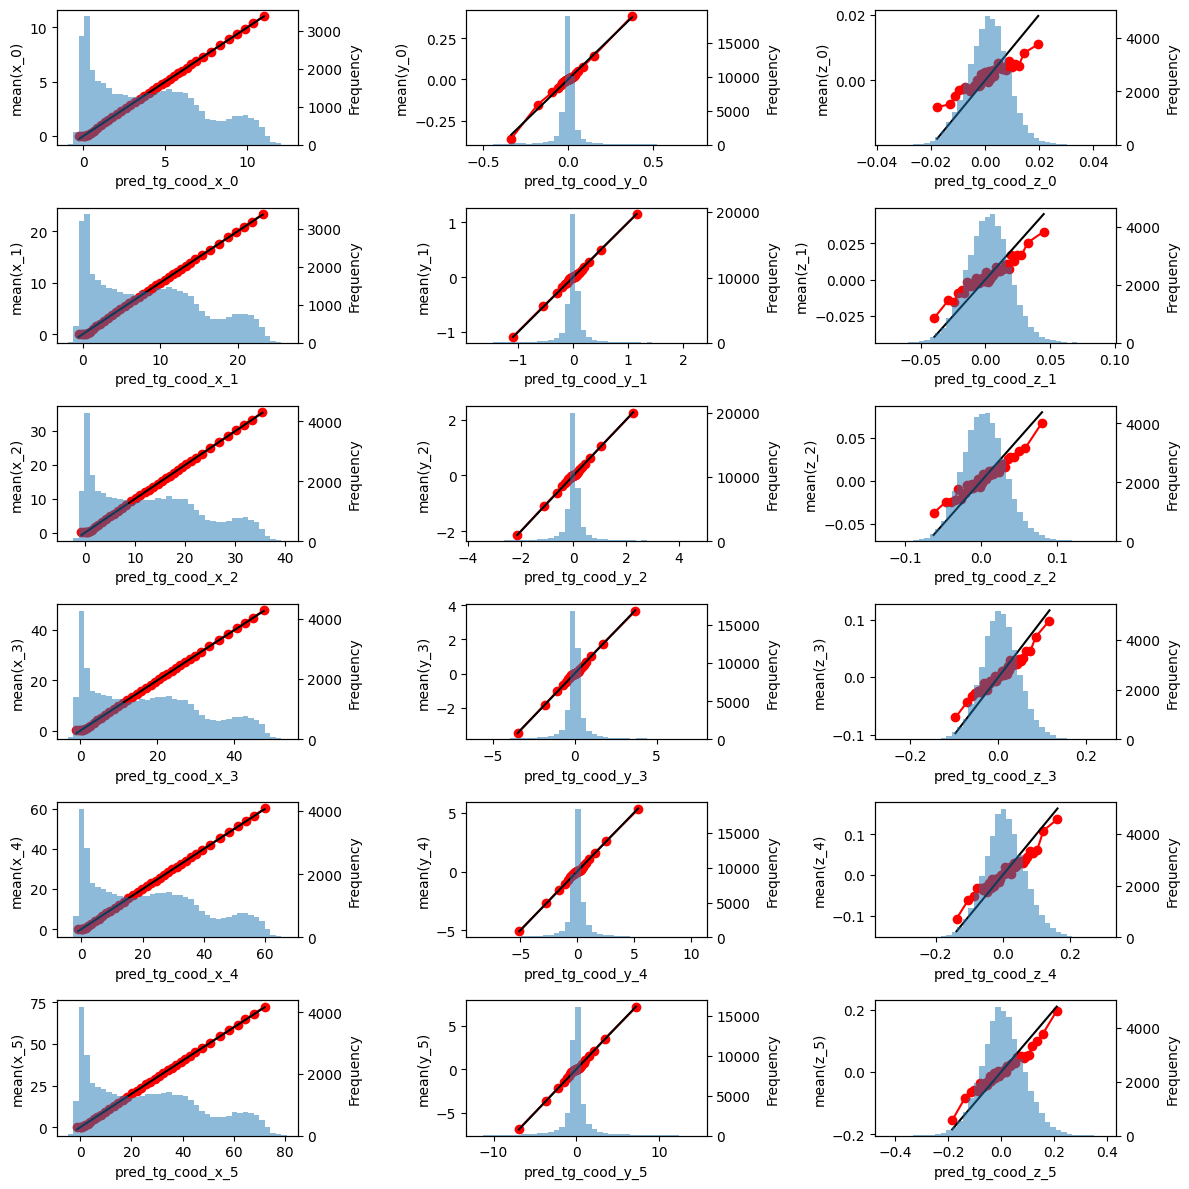

In [16]:
utils.plot_calibration_curve(tr_df, pred_cols, n_bins=40)

## Submission

In [17]:
preds = utils.predict(models, ts_images, ts_df, feature.columns, pred_cols)
preds

pred_tg_cood_x_0,pred_tg_cood_y_0,pred_tg_cood_z_0,pred_tg_cood_x_1,pred_tg_cood_y_1,pred_tg_cood_z_1,pred_tg_cood_x_2,pred_tg_cood_y_2,pred_tg_cood_z_2,pred_tg_cood_x_3,pred_tg_cood_y_3,pred_tg_cood_z_3,pred_tg_cood_x_4,pred_tg_cood_y_4,pred_tg_cood_z_4,pred_tg_cood_x_5,pred_tg_cood_y_5,pred_tg_cood_z_5
f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
1.041126,0.002427,0.003676,2.223036,-0.00644,0.00339,3.575162,0.17401,-0.012262,3.367223,0.327985,0.017504,5.51121,0.283762,0.024275,7.2707,0.29073,0.035784
1.16703,0.346441,-0.009019,2.30706,0.98912,-0.007245,3.337478,1.823812,-0.019167,4.703747,2.883082,-0.018297,5.380732,4.084804,-0.017587,6.297746,5.337615,-0.007513
1.889734,0.009404,0.007038,3.474539,0.035189,0.000868,5.847356,0.025308,-0.002174,7.199527,-0.136207,-0.00486,8.72613,-0.288993,0.011282,10.180713,-0.428923,-0.004173
0.592819,0.008124,-0.00992,0.574516,0.048552,-0.017777,1.473519,0.133603,-0.033054,1.639671,0.362213,-0.0156,2.143673,0.455173,-0.055476,2.205547,0.707678,-0.042327
1.041915,-0.004736,-0.016948,1.981354,-0.03164,-0.042942,2.439464,-0.004261,-0.05883,2.565466,-0.015839,-0.096424,2.775953,-0.054993,-0.104778,3.034462,-0.108374,-0.147973
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
6.505185,0.023706,0.009132,13.794643,0.116565,0.026385,20.933414,0.248228,0.035058,27.86784,0.499878,0.021559,35.299423,0.812332,0.010193,42.7271,0.986274,0.016588
7.024923,-0.009982,-0.011544,15.001234,-0.069829,-0.011077,22.802139,-0.152003,-0.017411,30.997597,-0.243098,-0.047758,39.859623,-0.307703,-0.08855,47.575272,-0.381983,-0.07389
7.464627,-0.019957,-0.00229,15.825096,-0.099641,0.010001,23.888077,-0.209034,0.015278,32.366364,-0.369581,0.055407,40.611938,-0.528095,0.074579,49.133194,-0.733621,0.121213


In [18]:
def create_submission_csv(preds: pl.DataFrame, filename: str = "submission.csv"):
    submission_cols = sum([[f"x_{i}", f"y_{i}", f"z_{i}"] for i in range(6)], [])

    # validate preds columns
    if len(preds.columns) != len(submission_cols):
        raise ValueError(
            f"preds columns must be {len(submission_cols)}, but got {len(preds.columns)}"
        )

    preds.columns = submission_cols
    preds.write_csv(filename)
    print(f"Submission file is created: {filename}")


create_submission_csv(preds)

Submission file is created: submission.csv
